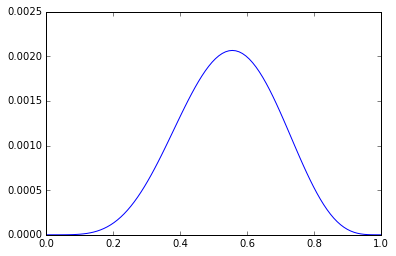

In [33]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0,1,100)   # We want to ensure we have enough "granularity" in the graph so we set hasmarks to 100
y = x**5*(1-x)**4  # Mapping the Bernoulli scheme
plt.plot(x,y)


$$\frac{d}{dp} p^5(1-p)^4 = 0$$

$$5p^4(1-p)^4 - 4(1-p)^3p^5 = 0$$

$$ 5p^4(1-p)^4 = 4(1-p)^3p^5 $$

In [34]:
from sympy.solvers import solve
from sympy import Symbol
p = Symbol('p')
solve(5*p**4 * (1-p)**4 - (4*(1-p)**3)*p**5, p)[1]*1.0

0.555555555555556

$p = .55556$

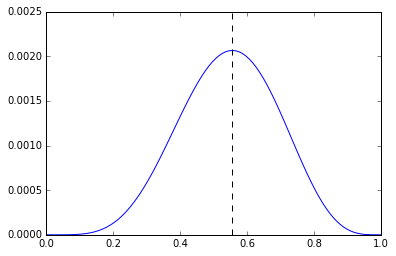

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0,1,100)   # We want to ensure we have enough "granularity" in the graph so we set hasmarks to 100
y = x**5*(1-x)**4  # Mapping the Bernoulli scheme
plt.plot(x,y)

plt.axvline(x=.55556,color='k',ls='dashed')

In [36]:
# !pip install thinkx

In [57]:
from thinkbayes2 import Pmf
from thinkbayes2 import Pdf
from thinkbayes2 import thinkplot

In [58]:
from __future__ import print_function

"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from thinkbayes import Suite


class Dice(Suite):
    """Represents hypotheses about which die was rolled."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer number of sides on the die
        data: integer die roll
        """
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

def main():
    
    suite = Dice([4, 6, 8, 12, 20])

    suite.Update(6)
    print('After one 6')
    suite.Print()

    for roll in [4, 8, 7, 7, 2]:
        suite.Update(roll)

    print('After more rolls')
    suite.Print()


if __name__ == '__main__':
    main()


After one 6
4 0.0
6 0.392156862745
8 0.294117647059
12 0.196078431373
20 0.117647058824
After more rolls
4 0.0
6 0.0
8 0.915845271969
12 0.080403425797
20 0.00375130223399


In [78]:
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from thinkbayes import Suite


class M_and_M(Suite):
    """Map from hypothesis (A or B) to probability."""

    mix94 = dict(brown=30,
                 yellow=20,
                 red=20,
                 green=10,
                 orange=10,
                 tan=10)

    mix96 = dict(blue=24,
                 green=20,
                 orange=16,
                 yellow=14,
                 red=13,
                 brown=13)

    hypoA = dict(bag1=mix94, bag2=mix96)
    hypoB = dict(bag1=mix96, bag2=mix94)

    hypotheses = dict(A=hypoA, B=hypoB)

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: string hypothesis (A or B)
        data: tuple of string bag, string color
        """
        bag, color = data
        mix = self.hypotheses[hypo][bag]
        like = mix[color]
        return like


def main():
    suite = M_and_M('AB')

    suite.Update(('bag1', 'yellow'))
    suite.Update(('bag2', 'green'))

    suite.Print()


if __name__ == '__main__':
    main()


A 0.740740740741
B 0.259259259259
